In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"samidurais","key":"dcff998d1f96ebd677179d00ff56c30d"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           5420        165  1.0              
madhurpant/world-deaths-and-causes-1990-2019                    World Deaths and Causes (1990 - 2019)               442KB  2022-11-29 07:09:27            816         23  1.0              
thedevastator/jobs-dataset-from-glassdoor                       Salary Prediction                                     3MB  2022-11-16 13:52:31           3576         83  1.0              
thedevastator/how-much-sleep-do-americans-really-get        

In [ ]:
! kaggle datasets download -d misrakahmed/vegetable-image-dataset

100% 534M/534M [00:27<00:00, 21.0MB/s]
100% 534M/534M [00:27<00:00, 20.1MB/s]


In [ ]:
! unzip vegetable-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/t

In [ ]:
! pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 32.5 MB/s 
     |████████████████████████████████| 1.6 MB 48.5 MB/s 


In [ ]:
import keras_tuner
from tensorflow import keras

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.applications.inception_v3 import preprocess_input

In [ ]:
data=ImageDataGenerator(rotation_range=0.3,
                        fill_mode='nearest',
                        featurewise_center=True,
                       width_shift_range=0.2,horizontal_flip=True,
                       brightness_range=[0.4,1.5],zoom_range=0.3,rescale=1/255)

In [ ]:
generator_simple =ImageDataGenerator(rescale=1/255)

In [ ]:
train_data=data.flow_from_directory(directory='/content/Vegetable Images/train',target_size=(224,224),batch_size=50
                                   ,class_mode='categorical')

Found 15000 images belonging to 15 classes.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
tr_img,lable=train_data.next()

In [ ]:
import matplotlib.pyplot as plt

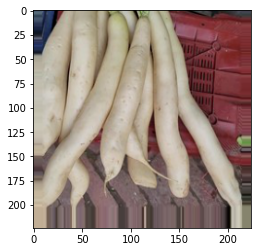

In [ ]:
plt.imshow(tr_img[1])

In [ ]:
tr_img.shape

(50, 224, 224, 3)

In [ ]:
def imag(img_arr,lable):
    for imd,img in enumerate(img_arr):
        if imd<=5:
            plt.figure(figsize=(5,5))
            plt.imshow(img)
            plt.title(img.shape)
            plt.axis=False
            plt.show()

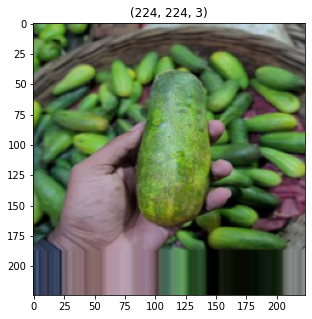

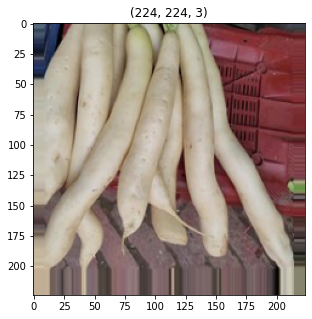

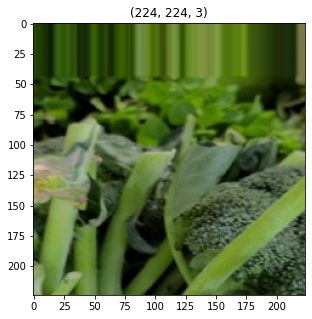

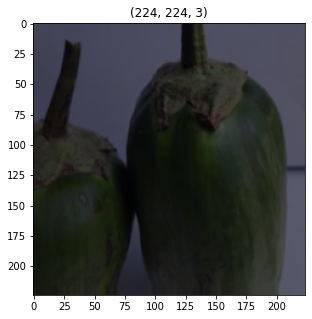

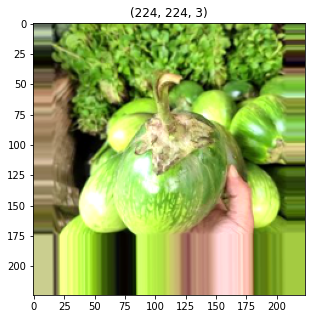

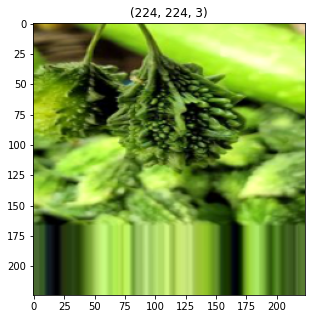

In [ ]:
imag(tr_img,lable)

In [ ]:
test_data=generator_simple.flow_from_directory(directory='/content/Vegetable Images/test',target_size=(224,224)
                                   ,class_mode='categorical',batch_size=50)

valid_data=generator_simple.flow_from_directory(directory='/content/Vegetable Images/validation',target_size=(224,224)
                                   ,class_mode='categorical',batch_size=50)

Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [ ]:
input_shape=(224,224,3)

In [ ]:
model=Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu",input_shape = input_shape))  
model.add(MaxPooling2D(pool_size =(2, 2)))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 128, kernel_size =(3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size =(2, 2)))
model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dropout(rate = 0.5))
model.add(Dense(units = 512, activation = "relu"))
model.add(Dropout(rate = 0.5))
model.add(Dense(units = 512, activation = "relu"))
model.add(Dense(units = 15, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 26, 26, 128)     

In [ ]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
model.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cp=ModelCheckpoint(filepath='./best_model.h5',
                   monitor='val_accuracy',
                   verbose=1,save_best_only=True)

es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=5,verbose=1)

cb=[cp,es]

In [ ]:
hist=model.fit_generator(train_data,epochs=30,steps_per_epoch=200,callbacks=cb,validation_data=valid_data,validation_steps=10)

Epoch 1/30
200/200 [==============================] - ETA: 0s - loss: 1.9937 - accuracy: 0.2877
Epoch 1: val_accuracy improved from -inf to 0.41400, saving model to ./best_model.h5
200/200 [==============================] - 129s 641ms/step - loss: 1.9937 - accuracy: 0.2877 - val_loss: 1.5683 - val_accuracy: 0.4140
Epoch 2/30
200/200 [==============================] - ETA: 0s - loss: 1.3695 - accuracy: 0.5186
Epoch 2: val_accuracy improved from 0.41400 to 0.62400, saving model to ./best_model.h5
200/200 [==============================] - 131s 656ms/step - loss: 1.3695 - accuracy: 0.5186 - val_loss: 1.0329 - val_accuracy: 0.6240
Epoch 3/30
200/200 [==============================] - ETA: 0s - loss: 1.1593 - accuracy: 0.5915
Epoch 3: val_accuracy improved from 0.62400 to 0.64800, saving model to ./best_model.h5
200/200 [==============================] - 128s 640ms/step - loss: 1.1593 - accuracy: 0.5915 - val_loss: 0.9202 - val_accuracy: 0.6480
Epoch 4/30
200/200 [==========================